In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


In [2]:
import pandas as pd

df = pd.read_csv('C://Users//Chick//AI-class//car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Text(0.5, 1.0, 'Rating')

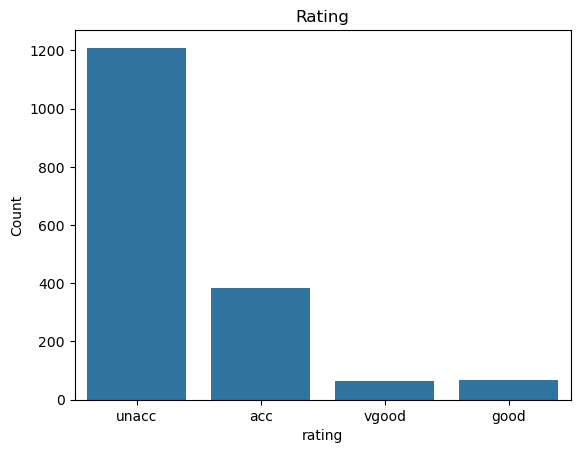

In [3]:
# 레이블 개수 확인(그래프)
sns.countplot(data = df, x="unacc")
plt.xlabel("rating")
plt.ylabel("Count")
plt.title("Rating")

In [4]:
# 레이블 갯수 확인 (숫자)
df['unacc'].value_counts()


unacc
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [5]:
# 2. 결측치 확인
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [6]:
df['2.1'].value_counts()

2.1
4       576
more    576
2       575
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 생성
le = LabelEncoder()

# 전체 열을 한 번에 변환
df = df.apply(lambda col: le.fit_transform(col))

df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [9]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique())
    plt.title(f"{model_name} Confusion Maxtrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [10]:
# 데이터 분할
X = df.drop('unacc', axis=1)
y = df['unacc']


In [11]:
# 훈련데이터와 테스트데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# StandardScaler를 사용해 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Decision Tree 결과:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        77
           1       0.75      0.80      0.77        15
           2       1.00      1.00      1.00       237
           3       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.89      0.91      0.90       346
weighted avg       0.97      0.97      0.97       346



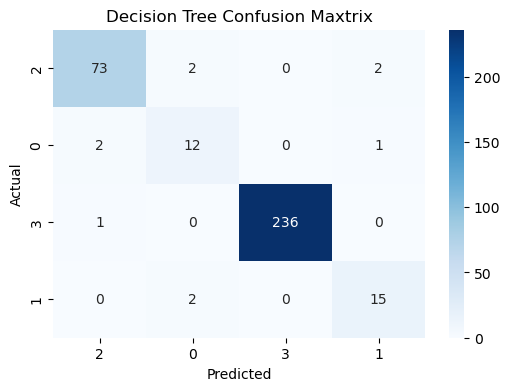

In [13]:
# Decision Tree 모델
dt_model = DecisionTreeClassifier(random_state=42) # Decision Tree 분류기 객체 생성
dt_model.fit(X_train, y_train) # 학습 데이터를 사용해 모델 훈련
dt_pred = dt_model.predict(X_test) # 테스트 데이터에 대한 예측 수행

# 예측 및 정확도 계산
print("Decision Tree 결과:\n", classification_report(y_test, dt_pred)) # Decision Tree 모델의 성능평가
plot_confusion_matrix(y_test, dt_pred, "Decision Tree") # Confusion Matrix를 시각화하여 예측 정확도 확인

Logistic Regression 결과:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        77
           1       0.75      0.80      0.77        15
           2       1.00      1.00      1.00       237
           3       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.89      0.91      0.90       346
weighted avg       0.97      0.97      0.97       346



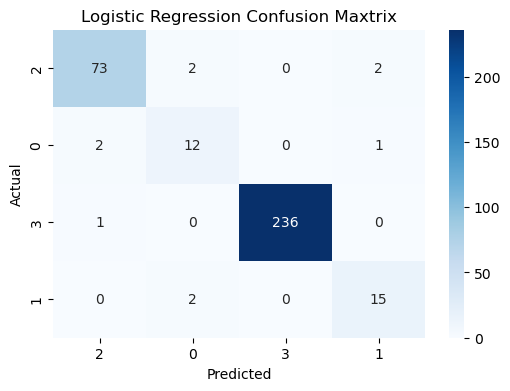

In [14]:
# Logistic Regression 모델
lr_model = LogisticRegression(max_iter=200) # Logistic Regression 분류기 객체 생성
lr_model.fit(X_train, y_train) # 학습 데이터를 사용해 모델 훈련
lr_pred = lr_model.predict(X_test) # 테스트 데이터에 대한 예측 수행

print("Logistic Regression 결과:\n", classification_report(y_test, dt_pred)) # Logistic Regression 모델의 성능 평가
plot_confusion_matrix(y_test, dt_pred, "Logistic Regression") # Confusion Matrix을 시각화하여 예측 정확도 확인

Support Vector Classifier 결과:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        77
           1       0.75      0.80      0.77        15
           2       1.00      1.00      1.00       237
           3       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.89      0.91      0.90       346
weighted avg       0.97      0.97      0.97       346



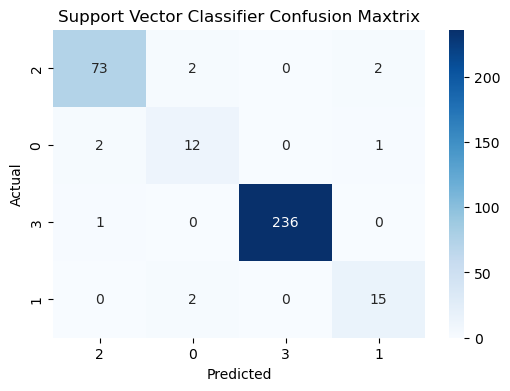

In [15]:
# Support Vector Classifier 모델
svc_model = SVC() # Support Vector Classifier 분류기 객체 생성
svc_model.fit(X_train, y_train) # 학습 데이터를 사용해 모델 훈련
svc_pred = svc_model.predict(X_test) # 테스트 데이터에 대한 예측 수행
print("Support Vector Classifier 결과:\n", classification_report(y_test, dt_pred)) # Support Vector Classifier 모델의 성능 평가  
plot_confusion_matrix(y_test, dt_pred, "Support Vector Classifier") # Confusion Matrix을 시각화하여 예측 정확도 확인

Rancom Forest 결과:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        77
           1       0.75      0.80      0.77        15
           2       1.00      1.00      1.00       237
           3       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.89      0.91      0.90       346
weighted avg       0.97      0.97      0.97       346



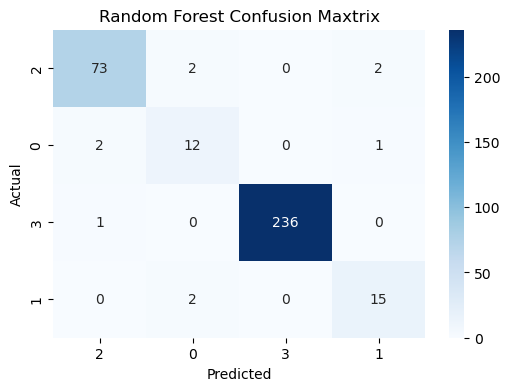

In [16]:
# Random Forest 모델
rf_model = RandomForestClassifier() # Random Forest 분류기 객체 생성
rf_model.fit(X_train, y_train) # 학습 데이터를 활용해 모델 훈련
rf_pred = rf_model.predict(X_test) # 테스트 데이터에 대한 예측을 수행

print("Rancom Forest 결과:\n", classification_report(y_test, dt_pred)) #Random Forest 모델의 성능 평가(classification_report 출력)
plot_confusion_matrix(y_test, dt_pred, "Random Forest") # Confusion Maxtrix를 시각화하여 예측 정확도 확인

K-Nearest Neighbors 결과:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        77
           1       0.75      0.80      0.77        15
           2       1.00      1.00      1.00       237
           3       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.89      0.91      0.90       346
weighted avg       0.97      0.97      0.97       346



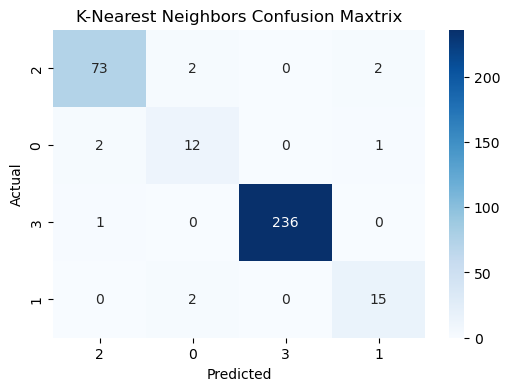

In [17]:
# K-Nearest Neighbors 모델
knn_model = KNeighborsClassifier()  # K-Nearest Neighbors 분류기 객체 생성
knn_model.fit(X_train, y_train)  # 학습 데이터를 사용해 모델 훈련
knn_pred = knn_model.predict(X_test)  # 테스트 데이터에 대한 예측 수행

print("K-Nearest Neighbors 결과:\n", classification_report(y_test, dt_pred)) #Random Forest 모델의 성능 평가(classification_report 출력)
plot_confusion_matrix(y_test, dt_pred, "K-Nearest Neighbors") # Confusion Maxtrix를 시각화하여 예측 정확도 확인